# Bending of the lithosphere under seamounts

**Goal:** Implement the finite-difference solution to the 1D flexure equation and compare it's predictions against observations of gravity disturbances and bathymetry.

With the appropriate boundary condition, we can use the 1D flexure equation to model the bending of the oceanic lithosphere under the load of a seamount or island chain. **Our assumption is that the plate is perfectly elastic and structures are infinite perpendicular to the profile.** 

<img style="width: 500px; margin: 10px auto;" src="https://github.com/leouieda/lithosphere/raw/be03c3400f4850de815a71b8536874ee2af4308b/lectures/assets/flexure-seamount.svg">
<p style="text-align: left; width: 500px; max-width: 100%; margin: 30px auto;">
Figure caption: Sketch of the elastic plate flexure for a load $q(x)$.
</p>

## Governing equations

The equation describing the deflection ($w$) of an elastic plate subject to a vertical load is:

$$ D\dfrac{\partial^4 w}{\partial x^4} = q(x) - g (\rho_m - \rho_w) w $$

in which $x$ is the position along the profile, $D$ is the flexural rigidity of the plate, $rho_w$ and $rho_m$ are the water and mantle densities, $g$ is gravity (for these purposes, assume $9.8\ m/s^2$), and $q(x)$ is a force density applied by the load on the plate (the weight of the topography). The term $g (\rho_m - \rho_w) w$ is the restoring hydrostatic force (buoyancy) from replacing mantle material at depth with water on top because of the flexure.

The **flexural rigidity** $D$ can be described in terms of the plate's elastic parameters:

$$ D = \dfrac{E T_e^3}{12(1 - \nu^2)} $$

where $E$ is [Young's modulus](https://en.wikipedia.org/wiki/Young's_modulus), $\nu$ is [Poisson's ratio](https://en.wikipedia.org/wiki/Poisson's_ratio), and $T_e$ is the *effective elastic thickness*.

The **load force per unit area** $q(x)$ is the weight of the load applied on the lithosphere. For a load of height $h$ and density $\rho_c$, the weight per unit area is (negative because the force is applied downwards):

$$ q(x) = -g \rho_c h(x) $$

## Boundary conditions

If we assume that the load is applied somewhere in the middle of the plate, we can consider the boundaries as stable lithosphere under no load. In that case, we don't expect to see any deflection at the boundaries. We can also impose that the first derivative of deflection is zero at the boundaries (the plate approaches the boundaries horizontally, not at an angle). This leads to the boundary conditions:

$$
\begin{align}
    w(x=0) &= 0 \\
    w(x=x_{max}) &= 0 \\
    \dfrac{\partial w}{\partial x}(x=0) &= 0 \\
    \dfrac{\partial w}{\partial x}(x=x_{max}) &= 0
\end{align}
$$

## Finite-difference solution

The finite-difference solution to the flexure equation is the solution to the equation system:

$$
\begin{align}
  D w_{4} - 4 D w_{3} + \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] w_2 - 4 D w_{1} + D w_{0} &= \Delta x^4 q_2  \\ 
  D w_{5} - 4 D w_{4} + \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] w_3 - 4 D w_{2} + D w_{1} &= \Delta x^4 q_3  \\ 
  \vdots & \\
  D w_{N-1} - 4 D w_{N-2} + \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] w_{N-3} - 4 D w_{N-4} + D w_{N-5} &= \Delta x^4 q_{N-3} \\
  w_0 &= 0  \\
  w_{N-1} &= 0  \\
  w_1 - w_0 &= 0  \\
  w_{N-1} - w_{N-2} &= 0 
\end{align}
$$

Here, the continuous $w$ and $q$ have been discretized into $N$ values with a spacing of $\Delta x$ between them. 

Another way of writing this equation system is using a matrix notation:

$$
\underbrace{
\begin{bmatrix}
  D  & -4D & \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] & -4D & D & 0 & 0 & \ldots & 0 & 0 \\ 
  0 & D  & -4D & \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] & -4D & D & 0 & \ldots & 0 & 0 \\ 
  \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots  \\
  1 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0  \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 1  \\
  -1 & 1 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0  \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & -1 & 1
 \end{bmatrix}
}_{\bar{\bar{A}}}
\underbrace{
\begin{bmatrix}
  w_0 \\
  w_1 \\
  w_2 \\
  w_3 \\
  w_4 \\
  w_5 \\
  w_6 \\
  \vdots \\
  w_{N-1} 
 \end{bmatrix}
}_{\bar{w}}
 =
\underbrace{
\begin{bmatrix}
  \Delta x^4 q_2 \\
  \Delta x^4 q_3 \\
  \vdots \\
  0\\
  0\\
  0\\
  0
 \end{bmatrix}
}_{\bar{b}}
$$

$$
\bar{\bar{A}} \bar{w} = \bar{b}
$$

We'll need to figure out a way to build the $\bar{\bar{A}}$ matrix and $\bar{b}$ vector. Once we have those, we can the deflection $\bar{w}$ using `numpy.linalg.solve`.

## Density anomalies

We can also predict the observed gravity disturbances due to the density anomalies caused by the downward deflection of the oceanic crust. The figure below illustrate a conceptual model of the density anomalies causing the observed data.

<img style="width: 500px; margin: 10px auto;" src="https://github.com/leouieda/lithosphere/raw/be03c3400f4850de815a71b8536874ee2af4308b/lectures/assets/disturbance-flexure-model.svg">
<p style="text-align: left; width: 500px; max-width: 100%; margin: 30px auto;">
Figure caption: Model of the density anomalies causing the observed gravity disturbance due to the flexure and the presence of the seamount.
</p>

The gravitational effect of these density anomalies can be estimated using a **Bouguer plate approximation**: 

$$ g \approx 2 \pi G \Delta\rho |w| $$

We will have to consider the density constrasts carefully and also the seamount.

## The data

**Download** (if you haven't already): [global-geophysical-data.nc](https://github.com/leouieda/lithosphere/raw/main/data/global-geophysical-data.nc) (place it in the **same folder** as this notebook)

The data grids are stored in a [netCDF](https://en.wikipedia.org/wiki/NetCDF) file, which is a very common standard for storing and distributing gridded data. It's used throughout the Earth, ocean, and climate sciences and can be read an manipulated with most software platforms. It contains global grids of gravity, topography, and heat flow. All grids were interpolated onto the same resolution of 0.2 degrees (a compromise between resolution and size of the file) so that we can easily compare and use all of the data together.

* **Gravity**: generated from the [EIGEN-6C4 spherical harmonic model](https://doi.org/10.5880/icgem.2015.1) through the [ICGEM webservice](http://icgem.gfz-potsdam.de/home). It includes two grids: the gravity disturbance calculated with the WGS84 ellipsoid and the Bouguer gravity disturbance calculated using a topography density of 2670 kg/m³. The data for both grids was generated on top of the Earth's surface (the water surface in the oceans and topography on land).
* **Topography and bathymetry**: a downsampled version of [ETOPO1](https://doi.org/10.7289/V5C8276M) and includes a version smoothed using a Gaussian filter with 1 degree width (~100 km).
* **Heat flow**: an upsampled version of the compilation by [Lucazeau (2019)](https://doi.org/10.1029/2019GC008389) (originally 0.5 degree resolution).
* **Lithosphere age (oceanic)**: a downsampled version of the grid by [Müller et al. (2008)](https://doi.org/10.1029/2007GC001743) (originally 6 arc-minutes).

## Import the required libraries

Load the required software to load the data, make maps, and perform calculations.

In [1]:
# For arrays and linear algebra
import numpy as np
# To make figures and maps
import matplotlib.pyplot as plt
# To load and manipulate grids
import xarray as xr
# Import our own module (lithosphere.py)
import lithosphere

## Load the data grids

Once again, we'll use xarray to load the data from the netCDF file.

In [2]:
data = xr.load_dataset("global-geophysical-data.nc")
data

<xarray.Dataset>
Dimensions:              (latitude: 901, longitude: 1800)
Coordinates:
  * latitude             (latitude) float32 -90.0 -89.8 -89.6 ... 89.6 89.8 90.0
  * longitude            (longitude) float32 -180.0 -179.8 ... 179.6 179.8
    height               (latitude, longitude) float32 2.716e+03 ... 15.47
Data variables:
    gravity_disturbance  (latitude, longitude) float32 -27.21 -27.21 ... 24.71
    gravity_bouguer      (latitude, longitude) float32 -331.2 -331.2 ... 312.6
    topography_smoothed  (latitude, longitude) float32 2.796e+03 ... -3.56e+03
    topography           (latitude, longitude) float32 2.716e+03 ... -4.213e+03
    heat_flow            (latitude, longitude) float32 75.2 75.2 ... 84.7 84.7
    lithosphere_age      (latitude, longitude) float32 nan nan ... 55.46 55.46

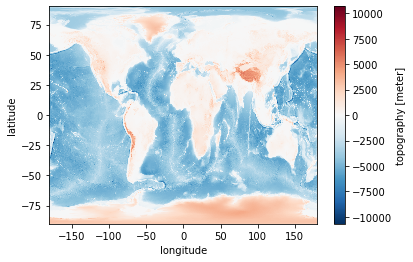

In [3]:
data.topography.plot()

## Extracting a profile 

Once again, we'll extract a profile from our data grids. This time, we will use the function that we placed in `lithosphere.py` so we don't have to copy the code into this notebook.

First, let's slice a region in the North Atlantic where there are some nice seamounts.

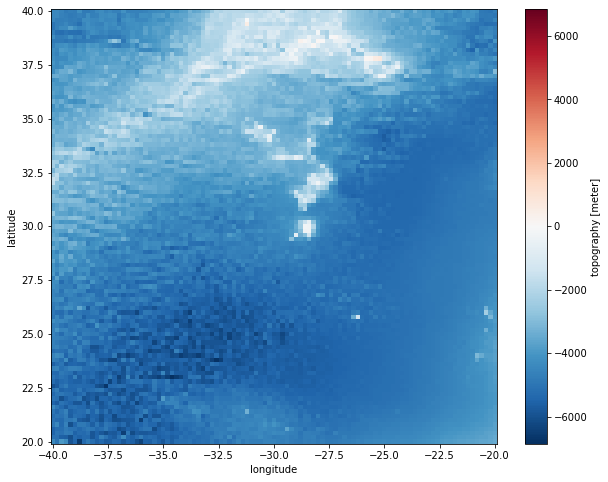

In [4]:
seamount_data = data.sel(longitude=slice(-40, -20), latitude=slice(20, 40))

seamount_data.topography.plot(figsize=(10, 8))

Now extract a profile that cuts across the seamount chain.

In [5]:
lon, lat = lithosphere.profile_points(start=(-33, 31), end=(-24, 31), npoints=100)
profile = seamount_data.interp(longitude=lon, latitude=lat)

Plot the location of the profile.

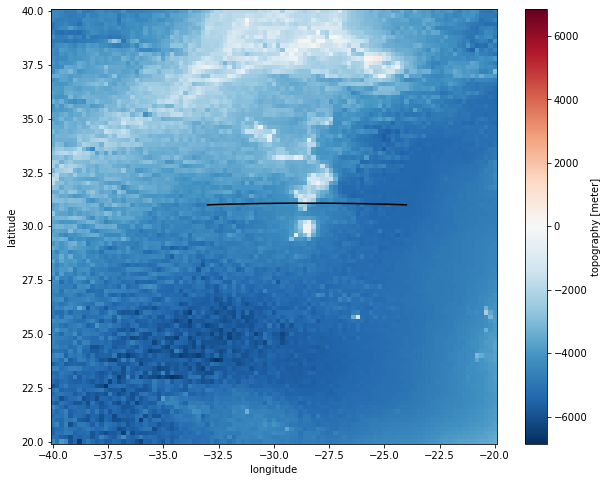

In [6]:
seamount_data.topography.plot(figsize=(10, 8))
plt.plot(profile.longitude, profile.latitude, "k")

And the profile topography and gravity disturbance data.

(0.0, 857.5795528272889)

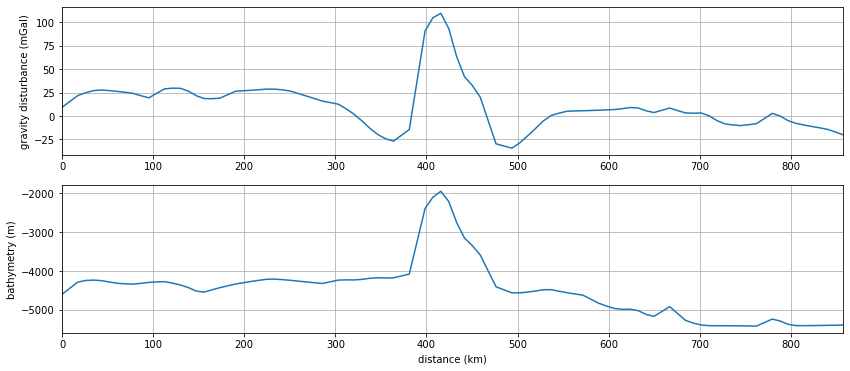

In [7]:
plt.figure(figsize=(14, 6))
ax = plt.subplot(2, 1, 1)
plt.plot(profile.distance, profile.gravity_disturbance)
plt.grid()
plt.ylabel("gravity disturbance (mGal)")
plt.xlim(profile.distance.min(), profile.distance.max())
plt.subplot(2, 1, 2)
plt.plot(profile.distance, profile.topography)
plt.grid()
plt.ylabel("bathymetry (m)")
plt.xlabel("distance (km)")
plt.xlim(profile.distance.min(), profile.distance.max())

We will need the height of the seamount load above the background bathymetry for our modeling. So let's see if we can calculate that.

In [29]:
reference_bathymetry = -4500
seamount_mask = np.logical_and(profile.distance > 370, profile.distance < 490)
load_bathymetry = xr.where(seamount_mask, profile.topography, reference_bathymetry)

(0.0, 857.5795528272889)

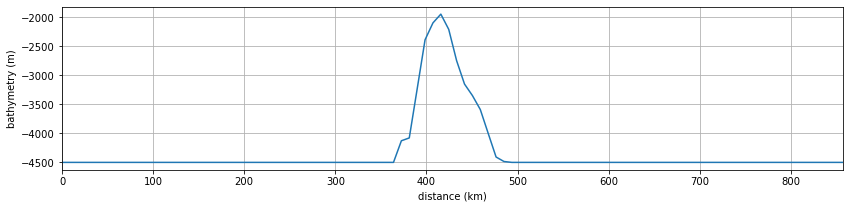

In [30]:
plt.figure(figsize=(14, 3))
plt.plot(profile.distance, load_bathymetry)
plt.grid()
plt.ylabel("bathymetry (m)")
plt.xlabel("distance (km)")
plt.xlim(profile.distance.min(), profile.distance.max())

## Solving the flexure equation

Now we can write the code for the finite-difference solution to our flexure equation.

In [31]:
def seamount_flexure(load, deltax, flexural_rigidity, density_contrast):
    """
    """
    N = load.size
    deltax4 = deltax ** 4
    gravity = 9.8
    A = np.zeros((N, N))
    # Build the finite-difference part of A
    for i in range(0, N - 4):
        A[i, i] = flexural_rigidity
        A[i, i + 1] = -4 * flexural_rigidity
        A[i, i + 2] = 6 * flexural_rigidity + deltax4 * density_contrast * gravity
        A[i, i + 3] = -4 * flexural_rigidity
        A[i, i + 4] = flexural_rigidity
    # Now fill in the boundary condition
    A[N - 4, 0] = 1
    A[N - 3, -1] = 1
    A[N - 2, 0] = -1
    A[N - 2, 1] = 1
    A[N - 1, -2] = -1
    A[N - 1, -1] = 1
    # Build the b vector
    b = np.zeros(N)
    for i in range(0, N - 4):
        b[i] = deltax4 * load[i + 2]
    # Solve for w
    deflection = np.linalg.solve(A, b)
    return deflection

Calculate the load force density using the seamount bathymetry we extracted earlier.

In [32]:
density_crust = 2800
density_water = 1000
density_mantle = 3300

In [33]:
load_height = load_bathymetry - reference_bathymetry
load = -9.8 * density_crust * load_height

Now solve for the deflection and plot it.

In [34]:
deltax = (profile.distance[1] - profile.distance[0]) * 1000
# The flexural rigidity can be calculated by assuming:
#   poisson's ration = 0.25
#   young's modulus = 70e9 kg/(s²m)
#   effective elastic thickness = 20e3 m
deflection = seamount_flexure(load, deltax, flexural_rigidity=1e22, density_contrast=(density_mantle - density_water))

(0.0, 857.5795528272889)

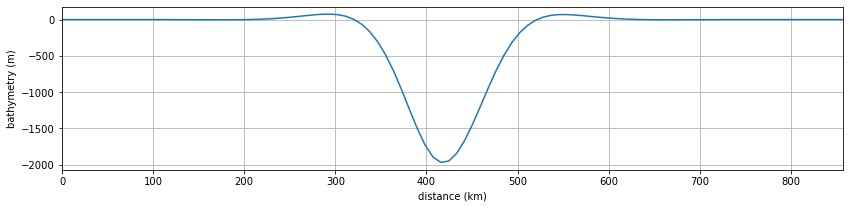

In [35]:
plt.figure(figsize=(14, 3))
plt.plot(profile.distance, deflection)
plt.grid()
plt.ylabel("bathymetry (m)")
plt.xlabel("distance (km)")
plt.xlim(profile.distance.min(), profile.distance.max())

## Predicting gravity

We can now use the deflection we estimated to calculate the predicted gravity disturbances. We can split the effect into 3 parts:

1. The seamount
2. The deflection at the surface
3. The deflection at the Moho

In [36]:
gravity_seamount = 2 * np.pi * lithosphere.GRAVITATIONAL_CONSTANT_SI * (density_crust - density_water) * load_height

density_surface = xr.where(deflection > 0, density_crust - density_water, 2000 - density_crust)
density_surface = xr.where(seamount_mask, 0, density_surface)
gravity_surface = 2 * np.pi * lithosphere.GRAVITATIONAL_CONSTANT_SI * density_surface * np.abs(deflection)

density_mantle = xr.where(deflection > 0, density_mantle - density_crust, density_crust - density_mantle)
gravity_mantle = 2 * np.pi * lithosphere.GRAVITATIONAL_CONSTANT_SI * density_mantle * np.abs(deflection)

predicted_gravity = 1e5 * (gravity_seamount + gravity_surface + gravity_mantle)

(0.0, 857.5795528272889)

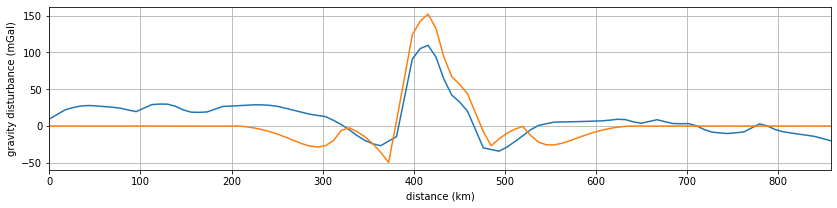

In [28]:
plt.figure(figsize=(14, 3))
plt.plot(profile.distance, profile.gravity_disturbance)
plt.plot(profile.distance, predicted_gravity)
plt.grid()
plt.ylabel("gravity disturbance (mGal)")
plt.xlabel("distance (km)")
plt.xlim(profile.distance.min(), profile.distance.max())